In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from preprocessing import EraseDuplicatedElect, GetHzStartEndIdxByElec, GetHzStartEndIdxByEMG, signal_mV, calc_y

In [21]:

def plot_signal(dir_path, file, a, b):
    plt.figure(figsize=(3,5))
    file = file + '.txt'
    tmp_a, tmp_b = a, b
    if 'EMG' in file:
        file_lines = [i.split(',') for i in open(dir_path+ file).readlines()]
        # print(file_lines)
        emg_raw = [int(i) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        # elect_raw = [int(i[:2] == '11') for 
        #                     line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        # elect_raw = np.array(elect_raw)
        print(emg_raw)
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(0,255)
    else:
        

        file_lines = [i.replace('\t', '-').split('-') for i in open(dir_path+ file).readlines()]

        emg_raw = [int(i[2:]) for 
                            line in file_lines for i in line if i.strip().isdigit()]
        elect_raw = [int(i[:2] == '11') for 
                            line in file_lines for i in line if i.strip().isdigit()]
        emg_raw = np.array(emg_raw)
        elect_raw = np.array(elect_raw)

        elect_fixed = EraseDuplicatedElect(elect_raw)
        # start_idx, end_idx = GetHzStartEndIdxByElec(isElec=elect_fixed)
        idx = GetHzStartEndIdxByElec(isElec=elect_fixed)

        emg_raw = np.array(emg_raw)
        emg_raw = signal_mV(emg_raw,500)
        elect_fixed = np.array(elect_fixed)
        plt.plot(emg_raw[tmp_a:tmp_b])
        plt.ylim(-3.5,3.5)

def highpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
        sos = signal.butter(poles, cutoff, 'highpass', fs=sample_rate, output='sos')
        filtered_data = signal.sosfiltfilt(sos, data)
        return filtered_data
def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
        sos = signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
        filtered_data = signal.sosfiltfilt(sos, data)
        return filtered_data
# hifiltered = highpass(temp, 180, Fs)

In [11]:
path = './Result_experiments/240617_smallEMG/'

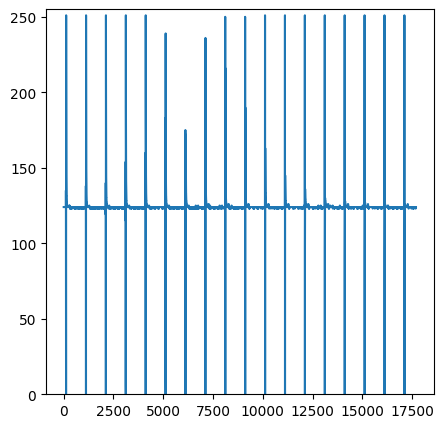

In [12]:
plot_signal(path, 'Impulse_0_20240617155406_2_quadriceps femoris_right_bipole', 0, -1)

# Big pad stimulation

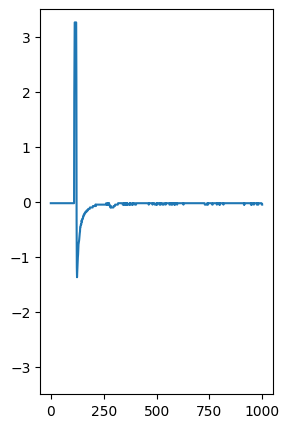

In [22]:
plot_signal(path, 'Impulse_0_20240617160325_2_quadriceps femoris_right_big1', 5000, 6000)

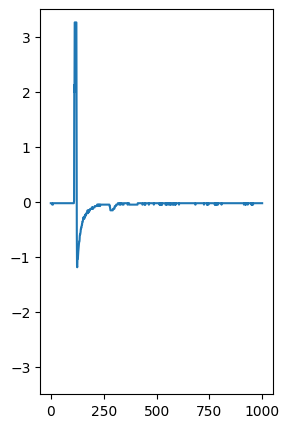

In [23]:
plot_signal(path, 'Impulse_0_20240617161315_2_quadriceps femoris_right_big2', 3000, 4000)

# Small pad stimulation

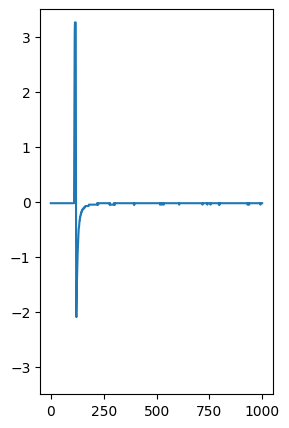

In [24]:
plot_signal(path, 'Impulse_0_20240617161139_2_quadriceps femoris_right_small', 3000, 4000)